#### Data Exploration: Summerize Data

In [2]:
def remap_org(df):
  # Given a dataframe, add a learner field with randome names
  
  url = 'https://gist.githubusercontent.com/Miserlou/11500b2345d3fe850c92/raw/e36859a9eef58c231865429ade1c142a2b75f16e/gistfile1.txt'
  skip = [0,1,2,4]
  # Read in a random name list
  cityDf = pd.read_csv(url, skiprows=skip, skipfooter=26, engine='python')
  # Get the largest cities
  nameList = cityDf[ cityDf['population'] > 900000].city.tolist()
  nameList = [' '.join( [ name, 'Schools' ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'org_id', 'org_new', nameList)
  
dfRaw = remap_org(dfRaw)


In [3]:
def remap_learner(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/huntergregal/wordlists/master/names.txt', header=None, names=['list']).list.tolist()
  
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'learner_id', 'learner_new', nameList)
  
  

dfRaw = remap_learner(dfRaw)

In [4]:
def remap_section(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/kjhealy/hourly/master/data/famous-people.csv').Name.tolist()
  suffix = ['High', 'Elementry', 'Secondary', 'Prep']
  
  nameList = [' '.join( [ name, suffix[random.randint(0, 3)] ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'section_id', 'section_new', nameList)
  
dfRaw = remap_section(dfRaw)

In [5]:
def remap_assessment(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  fields = ['one', 'two', 'topics', 'question','five','six','seven','eight', 'nine']
  url = 'https://gist.githubusercontent.com/blackwatertepes/5172428/raw/8bf38936cb47f03ed3e0ffb76ea5027d4ff0368a/jeopardy.txt'
  nameList = pd.read_csv(url, header=None, sep='\t', low_memory=False,error_bad_lines=False, names=fields, nrows=2000).topics.tolist()
  
  # Filter out names less than 2 words
  nameList = filter(lambda x: len(x.split()) > 2, nameList) 
  # Title case
  nameList = [name.title() for name in nameList]
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'assessment_id', 'assessment_new', nameList)
  

dfRaw = remap_assessment(dfRaw)

In [6]:
dfRaw.select().count()

Out[11]: 149807

In [7]:
pd.set_option('display.max_colwidth', None)
dfPanda = dfDesc.toPandas()
dfPanda

,field,category,type,description
0,assessment_id,Assessment,Categorical Identifier,ID of an Assessment.
1,assessment_instance_attempt_id,Assignment Attempt,Categorical Identifier,ID of a learner's attempt of an assessment.
2,assessment_instance_id,Assessment,Categorical Identifier,ID of a section's instance of an assessment.
3,assessment_item_response_id,Item Attempt,Categorical Identifier,ID of a learners response to an assessment item.
4,assigned_item_status,Item Attempt,Categorical Nominal,"Code indicating the status of the assessment item. Example: assigned, responded, offline_scorred, etc."
5,assignment_attempt_number,Assignment Attempt,Numeric Continuous,The nth time a certain learner attempted the assessement.
6,assignment_due_date,Assignment,Categorical Interval,The date and time the assignment is due.
7,assignment_final_submission_date,Assignment,Categorical Interval,The date and time the assignment was submitted for scoring.
8,assignment_late_submission,Assignment,Categorical Binary,True if the assignment was submitted late.
9,assignment_max_attempts,Assignment,Numeric Continuous,The number of times a learner can attempt the assessment.


In [8]:
dfDesc.select('category').distinct().show(20,False)

+------------------+
category |
+------------------+
Section |
Assignment Attempt|
Item |
Assessment |
Learner |
Organization |
Item Attempt |
Assignment |
+------------------+

In [9]:
orgVars               = dfPanda.loc[ dfPanda['category'] == 'Organization' ].field.tolist()
sectionVars           = dfPanda.loc[ dfPanda['category'] == 'Section' ].field.tolist()
learnerVars           = dfPanda.loc[ dfPanda['category'] == 'Learner' ].field.tolist()
assessmentVars        = dfPanda.loc[ dfPanda['category'] == 'Assessment' ].field.tolist()
assignmentVars        = dfPanda.loc[ dfPanda['category'] == 'Assignment' ].field.tolist()
itemVars              = dfPanda.loc[ dfPanda['category'] == 'Item' ].field.tolist()
assignmentAttemptVars = dfPanda.loc[ dfPanda['category'] == 'Assignment Attempt' ].field.tolist()
itemAttemptVars       = dfPanda.loc[ dfPanda['category'] == 'Item Attempt' ].field.tolist()

###### Display Sample Data

In [11]:
display( dfRaw.select(*orgVars, 'org_new').distinct() )

org_id,org_new
360421,Houston Schools
360541,San Diego Schools
349115,Los Angeles Schools


- 3 organizations

In [13]:
display( dfRaw.filter( F.col('org_id') == 360421).select(*sectionVars, 'section_new').distinct() )

section_id,section_new
499023,Sting Prep
498967,Oscar Wilde High
520208,Billie Holiday Prep
499047,V.Lenin Secondary
498945,Jesse Owens Secondary
530503,Neil Armstrong Prep
499028,Walt Disney Secondary
498977,Malcolm X Prep
499081,Marilyn Monroe Prep
498971,Leon Trotsky Prep


- 18 sections in organization 360421

In [15]:
display( dfRaw.filter( F.col('section_id') == 498941).select(*learnerVars, 'learner_new').distinct() )

learner_id,learner_new
1249505,Jorge
1249790,Priscilla
1365609,Robbie
1263887,Danice
1365062,Evy
1265162,Erika
1248228,Wai-Hung
1314462,Brandi
1385147,Maryanne
1249504,Barbee


- 24 learners in section 498941

In [17]:
display( dfRaw.filter( F.col('section_id') == 498941).select(*assessmentVars, 'assessment_new').distinct() )

assessment_id,assessment_instance_id,assessment_new
720657,799125,Stick With It
721038,846625,The Entertainment Business
720511,813988,"Embrace The ""Orb"""
721235,876562,Sports In The News
720591,878024,"Catching Some ""Z""S"
720761,879857,"Reading, Writing And Rock And Roll"


- 6 assessments in section 498941

###### Display Assignments for Section 498941

In [20]:
display( dfRaw.filter( F.col('section_id') == 498941).select('assessment_new', *assignmentVars).distinct() ).orderBy('assignment_due_date')

assessment_new,assignment_due_date,assignment_final_submission_date,assignment_late_submission,assignment_max_attempts,assignment_start_date,ced_assignment_type_code,is_affecting_grade,max_student_stop_datetime,min_student_start_datetime,number_of_distinct_instance_items,number_of_learners
The Entertainment Business,2019-10-30 04:59:00,2019-10-30 04:59:00,false,1,2019-10-28 05:00:00,clo,true,2019-11-16 04:09:25.260000,2019-10-28 19:49:28.028000,2,27
Sports In The News,2020-02-29 05:59:00,2020-02-29 05:59:00,false,1,2020-02-27 06:00:00,assessment,true,2020-02-29 06:00:06.925000,2020-02-27 21:04:03.241000,10,22
"Embrace The ""Orb""",2020-02-15 05:59:00,2020-02-15 05:59:00,false,1,2020-02-13 06:00:00,assessment,true,2999-01-01 00:00:00,1900-01-01 00:00:00,9,23
Stick With It,2019-11-06 05:59:00,2019-11-06 05:59:00,false,1,2019-10-31 05:00:00,assessment,true,2019-11-05 23:21:59.287000,2019-10-31 19:19:21.510000,18,27
"Catching Some ""Z""S",2020-01-18 05:59:00,2020-01-18 05:59:00,false,1,2020-01-16 06:00:00,assessment,true,2020-01-17 20:11:14.079000,2020-01-16 20:18:26.011000,19,23
"Reading, Writing And Rock And Roll",2020-04-12 04:59:00,2020-04-12 04:59:00,false,1,2020-04-09 05:00:00,assessment,true,2020-04-12 04:59:13.840000,2020-04-09 17:00:20.741000,12,23


- 6 assignments (one for each assessment) in section 498941

###### Display Assignment Items for Assessment 720657 of Section 498941

In [23]:
display( dfRaw.filter( F.col('assessment_id') == 720657).select(*itemVars).distinct() )

item_is_offline_scored,item_type_code_name,scoring_type_code
false,null,[unassigned]
true,trueFalse,automatic
false,multipleChoice,automatic
false,matching,automatic
false,essay,[unassigned]
false,shortAnswer,[unassigned]
false,trueFalse,automatic


- 7 items in assessment 720657
- 1 item (true/false) is offline scored
- 4 items automatice scoring code and 3 unassigned

###### Display Assignment Attempt for Attempt 1115526

In [26]:
display( dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*assignmentAttemptVars).distinct() )

assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
1115526,1,0,false,false,1050015,in progress,39.0,2999-01-01 00:00:00+00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00,2999-01-01 00:00:00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00


- Attempt is in progress (not finished)
- Empty (default) scored_datetime, student_stop_datetime, was_fully_scored_datetime, was_submitted_datetime_actual
- Final score is 0
- Same values in student_start_datetime and was_in_progress_datetime

###### Display Assignment Attempt for Attempt 1159455

In [29]:
display( dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*assignmentAttemptVars).distinct() )

assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
1159455,1,9,false,false,965818,fully scored,12.0,2020-04-11 03:59:35+00,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000,2020-04-11 03:59:35,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000


- Attempt is finished (fully scored)

###### Display Assignment Attempt Items for Attempt 1115526

In [32]:
display( dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*itemAttemptVars).distinct() )

assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
1572894,scored,false,1531985,correct
1592595,scored,false,1532003,correct
1626110,scored,false,1532004,correct
1571371,scored,false,1531981,incorrect
1561797,scored,false,1531983,incorrect
1616296,scored,false,1531998,incorrect
1571743,scored,false,1532001,correct
1556172,scored,false,1532002,correct
1652901,scored,false,1532000,incorrect
1631451,scored,false,1531984,incorrect


- 16 observations
- 15 answered (scored)
  - 7 correct
  - 7 incorrect
  - 1 partically correct
- 1 not answered (delivered)
  - assessment not completed

###### Display Assignment Attempt Items for Attempt 1159455

In [35]:
display( dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*itemAttemptVars).distinct() )

assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
1596516,scored,false,1413322,correct
1581835,scored,false,1413319,correct
1549179,scored,false,1413324,correct
1547897,scored,false,1413317,incorrect
1635317,scored,false,1413318,correct
1585073,scored,false,1413325,correct
1622897,scored,false,1413321,incorrect
1616794,scored,false,1413316,correct
1586273,scored,false,1413320,correct
1554205,scored,false,1413323,correct


##### Display Variables

###### Display Categorical Identifier Variables

In [38]:
# Save field names
identifierVarObs = dfDesc.filter("type = 'Categorical Identifier'")
identifierVars = [row['field'] for row in identifierVarObs.select('field').collect()]
identifierVarObs.select(F.col('field').alias('Categorical Identifier')).show(20,False)

+--------------------------------+
Categorical Identifier |
+--------------------------------+
assessment_id |
assessment_instance_attempt_id |
assessment_instance_id |
assessment_item_response_id |
learner_assigned_item_attempt_id|
learner_assignment_attempt_id |
learner_id |
org_id |
section_id |
+--------------------------------+

###### Display Categorical Nominal Variables

In [40]:
nominalVarObs    = dfDesc.filter("type = 'Categorical Nominal'")
nominalVars = [row['field'] for row in nominalVarObs.select('field').collect()]
nominalVarObs.select(F.col('field').alias('Categorical Nominal')).show(20,False)

+------------------------+
Categorical Nominal |
+------------------------+
assigned_item_status |
ced_assignment_type_code|
item_type_code_name |
learner_attempt_status |
response_correctness |
scoring_type_code |
+------------------------+

###### Display Numeric Continuous Variables

In [42]:
continousVarObs  = dfDesc.filter("type = 'Numeric Continuous'")
continousVars = [row['field'] for row in continousVarObs.select('field').collect()]
continousVarObs.select(F.col('field').alias('Numeric Continuous')).show(20,False)

+---------------------------------+
Numeric Continuous |
+---------------------------------+
assignment_attempt_number |
assignment_max_attempts |
final_score_unweighted |
number_of_distinct_instance_items|
number_of_learners |
points_possible_unweighted |
+---------------------------------+

###### Display Categorical Interval Varibles

In [44]:
intervalVarObs   = dfDesc.filter("type = 'Categorical Interval'")
intervalVars = [row['field'] for row in intervalVarObs.select('field').collect()]
intervalVarObs.select(F.col('field').alias('Categorical Interval')).show(20,False)

+--------------------------------+
Categorical Interval |
+--------------------------------+
assignment_due_date |
assignment_final_submission_date|
assignment_start_date |
max_student_stop_datetime |
min_student_start_datetime |
scored_datetime |
student_start_datetime |
student_stop_datetime |
was_fully_scored_datetime |
was_in_progress_datetime |
was_submitted_datetime_actual |
+--------------------------------+

In [45]:
binaryVarObs     = dfDesc.filter("type = 'Categorical Binary'")
binaryVars = [row['field'] for row in binaryVarObs.select('field').collect()]
binaryVarObs.select(F.col('field').alias('Categorical Binary')).show(20,False)

+--------------------------+
Categorical Binary |
+--------------------------+
assignment_late_submission|
is_affecting_grade |
is_deleted |
is_force_scored |
is_manual_scoring_required|
item_is_offline_scored |
+--------------------------+

In [46]:
# Set empty dates to null
for f in intervalVars:
  dfRaw = dfRaw.withColumn(f, F.col(f).cast(T.TimestampType() ) )


In [47]:
# Schema
dfRaw.printSchema()

root
-- ced_assignment_type_code: string (nullable = true)
-- is_affecting_grade: boolean (nullable = true)
-- number_of_learners: integer (nullable = true)
-- number_of_distinct_instance_items: integer (nullable = true)
-- assignment_max_attempts: integer (nullable = true)
-- assignment_late_submission: boolean (nullable = true)
-- assignment_final_submission_date: timestamp (nullable = true)
-- assignment_start_date: timestamp (nullable = true)
-- assignment_due_date: timestamp (nullable = true)
-- min_student_start_datetime: timestamp (nullable = true)
-- max_student_stop_datetime: timestamp (nullable = true)
-- assignment_attempt_number: integer (nullable = true)
-- was_fully_scored_datetime: timestamp (nullable = true)
-- was_submitted_datetime_actual: timestamp (nullable = true)
-- was_in_progress_datetime: timestamp (nullable = true)
-- is_force_scored: boolean (nullable = true)
-- is_manual_scoring_required: boolean (nullable = true)
-- student_start_datetime: timestamp (nullable = true)
-- student_stop_datetime: timestamp (nullable = true)
-- item_is_offline_scored: boolean (nullable = true)
-- learner_attempt_status: string (nullable = true)
-- points_possible_unweighted: double (nullable = true)
-- final_score_unweighted: integer (nullable = true)
-- scored_datetime: timestamp (nullable = true)
-- item_type_code_name: string (nullable = true)
-- scoring_type_code: string (nullable = true)
-- response_correctness: string (nullable = true)
-- assigned_item_status: string (nullable = true)
-- is_deleted: boolean (nullable = true)
-- org_id: integer (nullable = true)
-- section_id: integer (nullable = true)
-- assessment_id: integer (nullable = true)
-- assessment_instance_id: integer (nullable = true)
-- learner_assignment_attempt_id: integer (nullable = true)
-- assessment_instance_attempt_id: integer (nullable = true)
-- learner_id: integer (nullable = true)
-- learner_assigned_item_attempt_id: integer (nullable = true)
-- assessment_item_response_id: integer (nullable = true)
-- org_new: string (nullable = true)
-- learner_new: string (nullable = true)
-- section_new: string (nullable = true)
-- assessment_new: string (nullable = true)

In [48]:
dfRaw = dfRaw.filter(F.col('learner_attempt_status') == 'fully scored')

In [49]:
# Save as database view
dfRaw.createOrReplaceTempView('raw_data')

In [50]:
for f in identifierVars:
  print(f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null')
  ).show()

assessment_id
+------+----+
unique|null|
+------+----+
 329| 0|
+------+----+

assessment_instance_attempt_id
+------+----+
unique|null|
+------+----+
 8483|3264|
+------+----+

assessment_instance_id
+------+----+
unique|null|
+------+----+
 615| 0|
+------+----+

assessment_item_response_id
+------+-----+
unique| null|
+------+-----+
 64368|15710|
+------+-----+

learner_assigned_item_attempt_id
+------+----+
unique|null|
+------+----+
 79689| 0|
+------+----+

learner_assignment_attempt_id
+------+----+
unique|null|
+------+----+
 8855| 0|
+------+----+

learner_id
+------+----+
unique|null|
+------+----+
 1126| 0|
+------+----+

org_id
+------+----+
unique|null|
+------+----+
 3| 0|
+------+----+

section_id
+------+----+
unique|null|
+------+----+
 46| 0|
+------+----+

Totals
- org_id: 3
  - ID per organization
- section_id: 46
  - ID per section/school
- learner_id: 1126
  - ID per learner/student
- assessment_id: 329
  - ID per each assessment/quiz.  
- assessment_instance_id: 615
  - ID of each time a section uses the assessment
- assessment_instance_attempt_id: 8483 null: 3264
  - ID of each time an assessment is attempted by a student
- assessment_item_response_id: 64368 null: 15710
  - ID of each response/answer to an assessment question
- learner_assignment_attempt_id: 8855
  - ID of each learner attempt of an assigned assessment
- learner_assigned_item_attempt_id: 79689
  - ID of each learner attempt of a item/question on an assigned assessment

###### Variable Descriptive Statistics

In [53]:
# Categorical / Nominal Values
for f in nominalVars:
  dfRaw.groupBy(f).count().orderBy('count', ascending=False).show(50, False)
  

+--------------------+-----+
assigned_item_status|count|
+--------------------+-----+
scored |64804|
offline_scored |12446|
assigned |3264 |
responded |34 |
+--------------------+-----+

+------------------------+-----+
ced_assignment_type_code|count|
+------------------------+-----+
assessment |76172|
practice |2562 |
game |1555 |
clo |248 |
rubric |11 |
+------------------------+-----+

+----------------------+-----+
item_type_code_name |count|
+----------------------+-----+
multipleChoice |32451|
fillInTheBlank |12072|
equationEntry |9516 |
trueFalse |4963 |
cloze |3576 |
null |3264 |
multipleSelect |2691 |
graphing |2415 |
MultipleChoiceResponse|1550 |
choiceMatrix |1336 |
matching |1164 |
bucketing |1051 |
selectText |1025 |
essay |1000 |
shortAnswer |983 |
sortable |644 |
numberLine |455 |
aheAlgo |219 |
imageLabel |108 |
fileUpload |49 |
RubricResponse |11 |
FillinBlankResponse |5 |
+----------------------+-----+

+----------------------+-----+
learner_attempt_status|count|
+----------------------+-----+
fully scored |80548|
+----------------------+-----+

+--------------------+-----+
response_correctness|count|
+--------------------+-----+
correct |43761|
incorrect |30496|
null |3298 |
[unassigned] |1566 |
partially_correct |1427 |
+--------------------+-----+

+-----------------+-----+
scoring_type_code|count|
+-----------------+-----+
automatic |73467|
[unassigned] |4864 |
manual |1998 |
external |219 |
+-----------------+-----+

##### Null Values
- response_correctness
  - 3298 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- item_type_code_name
  - Investigate further
  - Could be related to unstarted or unanswered questions

##### Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels
  
##### learner_attempt_status
- Unary "fully scored"

In [55]:
# Create Todo list
add_todo('Investigate 3298 null values in response_correctness')
add_todo('Investigate 1566 [unassigned] in response_correctness')
add_todo('Investigate null values in item_type_code_name')
add_todo('Reduce number of levels in item_type_code_name')
add_todo('Remove unary learner_attempt_status = "fully scored"')

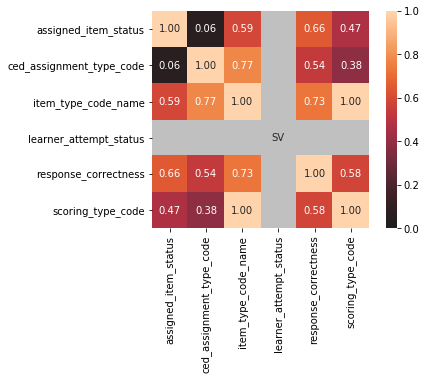

In [56]:
associations( dfRaw.select(*nominalVars).toPandas(), nan_replace_value='null' )

- High correlation between item_type_code_name and scoring_type_code

In [58]:
def item_to_code():
  dfPd = dfRaw.toPandas()
  return pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")
  
item_to_code()

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,1051,0,0,1051
choiceMatrix,0,1336,0,0,1336
cloze,0,3576,0,0,3576
equationEntry,0,9516,0,0,9516
essay,9,0,0,991,1000


- item_type_code_name indicates the scoring_type_code
  - scoring_type_code = '[unnassigned]' for item_type_code_name is..
    - shortAnswer, null, essay (9 times), RubricResponse, MultipleChoiceResponse, FillInBlankResponse
  - scoring_type_code = external only for item_type_code_name = aheAlgo
  - scoring_type_code = 'manual' for item_type_code_name is..
    - essay, fileUpload, shortAnswer

In [60]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = dfRaw.describe()
  for f in continousVars:
    desc.select("summary", f).show(5,False)

num_cont_vars()

+-------+-------------------------+
summary|assignment_attempt_number|
+-------+-------------------------+
count |80548 |
mean |0.9805581764910364 |
stddev |0.13807271883793762 |
min |0 |
max |1 |
+-------+-------------------------+

+-------+-----------------------+
summary|assignment_max_attempts|
+-------+-----------------------+
count |80548 |
mean |0.9805581764910364 |
stddev |0.13807271883793762 |
min |0 |
max |1 |
+-------+-----------------------+

+-------+----------------------+
summary|final_score_unweighted|
+-------+----------------------+
count |80548 |
mean |13.131449570442468 |
stddev |14.834671089990376 |
min |0 |
max |60 |
+-------+----------------------+

+-------+---------------------------------+
summary|number_of_distinct_instance_items|
+-------+---------------------------------+
count |80548 |
mean |17.712742712419924 |
stddev |13.900641092150773 |
min |1 |
max |60 |
+-------+---------------------------------+

+-------+------------------+
summary|number_of_learners|
+-------+------------------+
count |80548 |
mean |27.803744351194318|
stddev |8.831219354231413 |
min |1 |
max |47 |
+-------+------------------+

+-------+--------------------------+
summary|points_possible_unweighted|
+-------+--------------------------+
count |80548 |
mean |21.621414063663902 |
stddev |16.763088563844345 |
min |1.0 |
max |73.0 |
+-------+--------------------------+

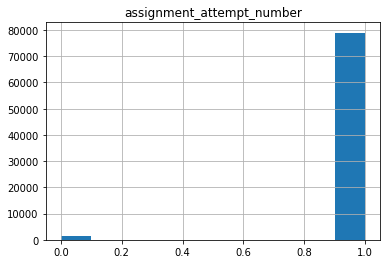

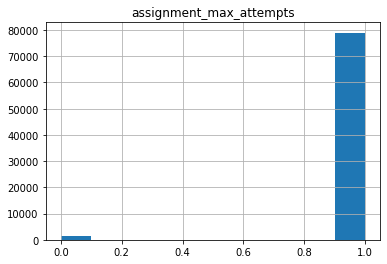

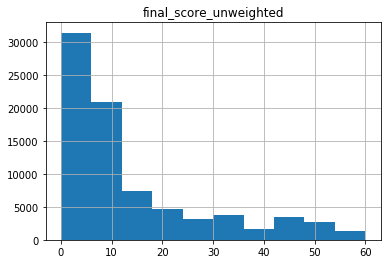

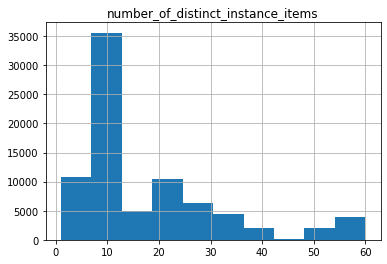

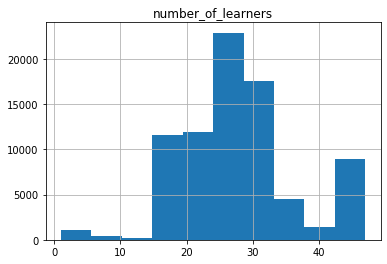

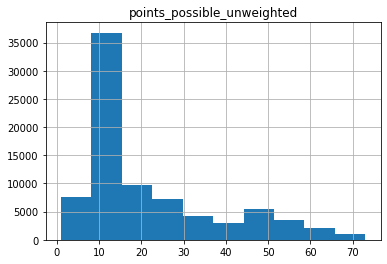

In [61]:
for f in continousVars:
  print(f)
  dfRaw.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
- possible outliers greaterthan 40
- investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

In [63]:
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

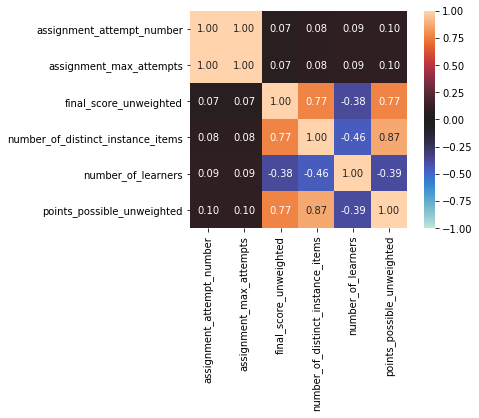

In [64]:
associations( dfRaw.select(*continousVars).toPandas(), nan_replace_value='null' )

- assignment_attempt_number and assignment_max_attempts highly correlated

In [66]:
def attempt_to_max():
  dfPd = dfRaw.toPandas()
  return pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")
  
attempt_to_max()

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,78982,78982
Total,1566,78982,80548


- assignment_max_attempts 1 is always assignment_attempt_number = 1

In [68]:
for c in continousVars:
  print(c)
  dfRaw.agg(
    F.count(F.when(F.col(c).isNull(), c)).alias('null'),
    F.count(F.when(F.col(c) == 0, c)).alias("zero")
  ).show()

assignment_attempt_number
+----+----+
null|zero|
+----+----+
 0|1566|
+----+----+

assignment_max_attempts
+----+----+
null|zero|
+----+----+
 0|1566|
+----+----+

final_score_unweighted
+----+-----+
null| zero|
+----+-----+
 0|16582|
+----+-----+

number_of_distinct_instance_items
+----+----+
null|zero|
+----+----+
 0| 0|
+----+----+

number_of_learners
+----+----+
null|zero|
+----+----+
 0| 0|
+----+----+

points_possible_unweighted
+----+----+
null|zero|
+----+----+
 0| 0|
+----+----+

- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 16,582 zero values
  - possibly because not yet scored
  - needs further investigation

In [70]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted has 16,582 zero values')

In [71]:
for f in intervalVars:
  print (f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null'),
    F.min(f).alias('min'),
    F.max(f).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
191 |0 |2019-08-23 04:59:00|2999-01-01 00:00:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
200 |0 |2019-08-23 04:59:00|2999-01-01 00:00:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
207 |0 |1900-01-01 00:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
521 |0 |2019-08-22 04:06:27.518|2020-05-26 04:59:17.367|
+------+----+-----------------------+-----------------------+

min_student_start_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
613 |0 |2019-08-21 23:33:10.917|2020-05-20 06:15:00.043|
+------+----+-----------------------+-----------------------+

scored_datetime
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
7188 |0 |2019-08-22 02:37:58|2999-01-01 00:00:00|
+------+----+-------------------+-------------------+

student_start_datetime
+------+----+-------------------+-----------------------+
unique|null|min |max |
+------+----+-------------------+-----------------------+
7386 |0 |1900-01-01 00:00:00|2020-05-26 04:59:17.367|
+------+----+-------------------+-----------------------+

student_stop_datetime
+------+----+-----------------------+-------------------+
unique|null|min |max |
+------+----+-----------------------+-------------------+
7128 |0 |2019-08-22 02:37:59.012|2999-01-01 00:00:00|
+------+----+-----------------------+-------------------+

was_fully_scored_datetime
+------+----+-----------------------+-------------------+
unique|null|min |max |
+------+----+-----------------------+-------------------+
8588 |0 |2019-08-22 02:37:59.012|2999-01-01 00:00:00|
+------+----+-----------------------+-------------------+

was_in_progress_datetime
+------+----+-----------------------+-------------------+
unique|null|min |max |
+------+----+-----------------------+-------------------+
7320 |0 |2019-08-22 01:57:32.893|2999-01-01 00:00:00|
+------+----+-----------------------+-------------------+

was_submitted_datetime_actual
+------+----+-----------------------+-------------------+
unique|null|min |max |
+------+----+-----------------------+-------------------+
6546 |0 |2019-08-22 13:09:24.898|2999-01-01 00:00:00|
+------+----+-----------------------+-------------------+

Default Date Values
- All variables have some dates have default values '2999-01-01 00:00:00' as max and '1900-01-01 00:00:00' as min
- Almost all interval variables
  - except max_student_stop_datetime and max_student_stop_datetime
- These are substitutes for no value and will need to be replaced nulls
- Further investigation is needed as what the nulls mean

In [73]:
add_todo('Replace default dates with nulls')
add_todo('Investigate why some dates are null')

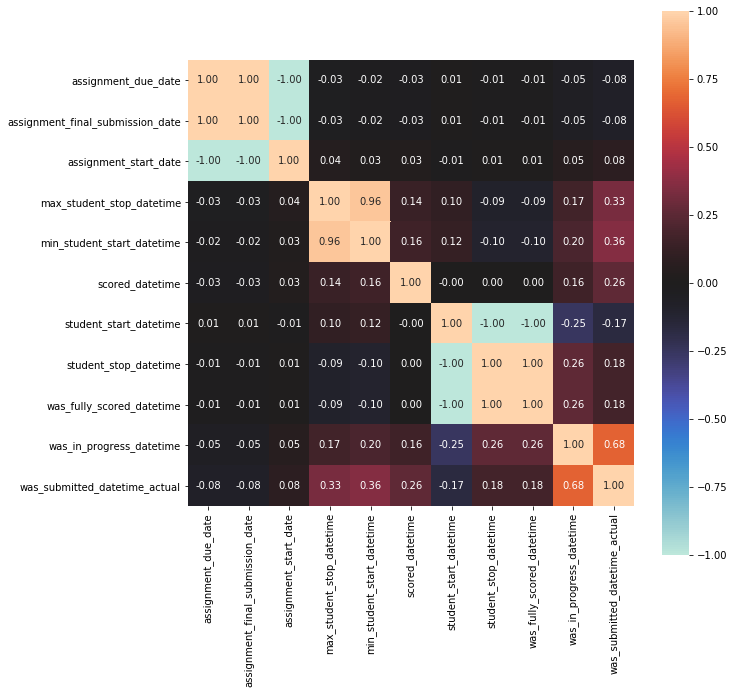

In [74]:
associations( dfRaw.select(* (F.unix_timestamp(c).alias(c) for c in intervalVars) ).toPandas(), figsize=[10,10] )

- Correlated dates
  - assignment_due_date and assignment_final_submission_date
  - assigment_due_date and assignment_start_date 
  - min_student_start_datetime and max_student_start_datetime
  - student_start_datetime and student_stop_datetime
  - student_start_datetime and was_fully_scored_datetime
  - student_stop_datetime and was_fully_scored_datetime
- Correlation appears to be because the events closely follow each other

In [76]:
# Categorical / Interval Variables
defaults = ["2999-01-01 00:00:00","1900-01-01 00:00:00"]

for f in intervalVars:
  print (f)
  dfRaw.agg(
    F.countDistinct(f).alias('unique'), 
    F.count( F.when(F.col(f).isNull(), f)).alias('null'),
    F.min( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('min'),
    F.max( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
191 |0 |2019-08-23 04:59:00|2020-05-26 04:59:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
200 |0 |2019-08-23 04:59:00|2020-06-05 04:59:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
207 |0 |2019-08-21 05:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
521 |0 |2019-08-22 04:06:27.518|2020-05-26 04:59:17.367|
+------+----+-----------------------+-----------------------+

min_student_start_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
613 |0 |2019-08-21 23:33:10.917|2020-05-20 06:15:00.043|
+------+----+-----------------------+-----------------------+

scored_datetime
+------+----+-------------------+-------------------+
unique|null|min |max |
+------+----+-------------------+-------------------+
7188 |0 |2019-08-22 02:37:58|2020-05-26 04:59:53|
+------+----+-------------------+-------------------+

student_start_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
7386 |0 |2019-08-22 01:57:32.893|2020-05-26 04:59:17.367|
+------+----+-----------------------+-----------------------+

student_stop_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
7128 |0 |2019-08-22 02:37:59.012|2020-05-26 04:59:17.367|
+------+----+-----------------------+-----------------------+

was_fully_scored_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
8588 |0 |2019-08-22 02:37:59.012|2020-05-26 04:59:53.903|
+------+----+-----------------------+-----------------------+

was_in_progress_datetime
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
7320 |0 |2019-08-22 01:57:32.893|2020-05-26 03:30:53.599|
+------+----+-----------------------+-----------------------+

was_submitted_datetime_actual
+------+----+-----------------------+-----------------------+
unique|null|min |max |
+------+----+-----------------------+-----------------------+
6546 |0 |2019-08-22 13:09:24.898|2020-05-26 04:00:13.372|
+------+----+-----------------------+-----------------------+

Dates fall in range of a school year of 8/2019 to 5/2020

In [78]:
# Categorical / Nominal Values
for f in binaryVars:
  dfRaw.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

+--------------------------+-----+
assignment_late_submission|count|
+--------------------------+-----+
false |80548|
+--------------------------+-----+

+------------------+-----+
is_affecting_grade|count|
+------------------+-----+
true |77986|
false |2562 |
+------------------+-----+

+----------+-----+
is_deleted|count|
+----------+-----+
false |80548|
+----------+-----+

+---------------+-----+
is_force_scored|count|
+---------------+-----+
false |68018|
true |12530|
+---------------+-----+

+--------------------------+-----+
is_manual_scoring_required|count|
+--------------------------+-----+
false |80547|
true |1 |
+--------------------------+-----+

+----------------------+-----+
item_is_offline_scored|count|
+----------------------+-----+
false |68102|
true |12446|
+----------------------+-----+

Variables With Unary Values
- assignment_late_submission and is_deleted
- is_manual_scoring_required has only one true value
- Variables will be removed

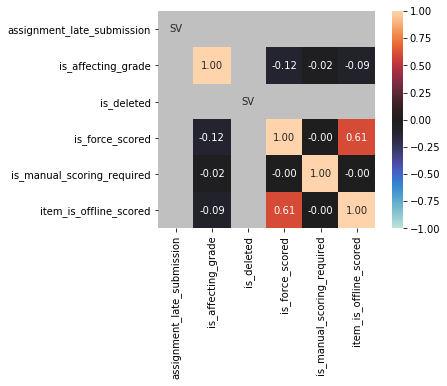

In [80]:
associations( dfRaw.select(*binaryVars).toPandas(), nan_replace_value='null' )

- No correlation

In [82]:
add_todo("Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted")

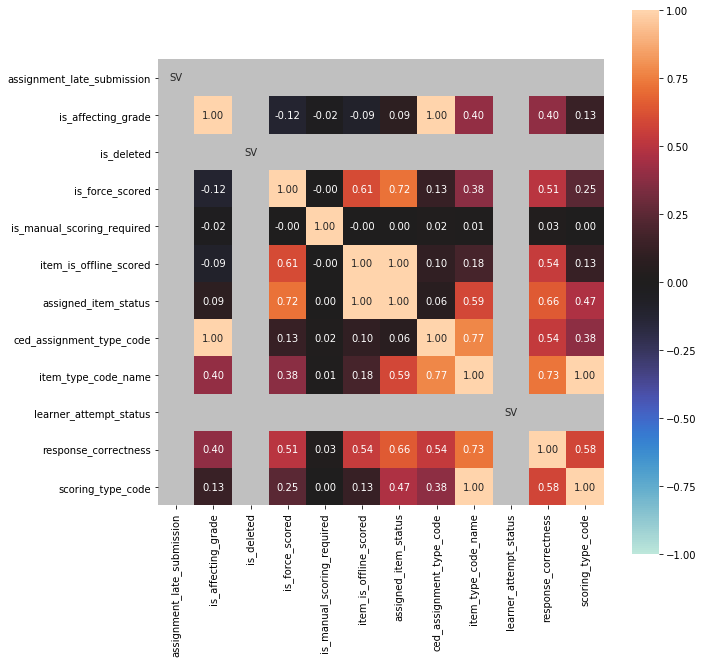

In [83]:
associations( dfRaw.select(*binaryVars, *nominalVars).toPandas(), nan_replace_value='null', figsize=[10,10] )

- New correlations
  - is_affecting_grade and ced_assignment_type_code
  - item_is_offline_scored and assigned_item_status

In [85]:
def grade_to_code():
  dfPd = dfRaw.toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")
  
grade_to_code()

ced_assignment_type_code,assessment,clo,game,practice,rubric,Total
is_affecting_grade,,,,,,
False,0,0,0,2562,0,2562
True,76172,248,1555,0,11,77986
Total,76172,248,1555,2562,11,80548


- is_affecting_grade = false when ced_assignment_type_code = practice

In [87]:
def offline_to_status():
  dfPd = dfRaw.toPandas()
  return pd.crosstab(dfPd.item_is_offline_scored.fillna('null'), dfPd.assigned_item_status.fillna('null'), margins=True, margins_name="Total")
  
offline_to_status()

assigned_item_status,assigned,offline_scored,responded,scored,Total
item_is_offline_scored,,,,,
False,3264,0,34,64804,68102
True,0,12446,0,0,12446
Total,3264,12446,34,64804,80548


- item_is_offline_scored = True is always assigned_item_status = offline_scored

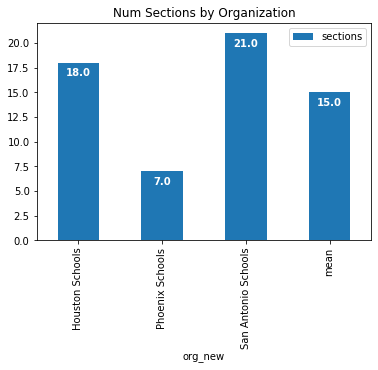

In [89]:
def sections_by_org():
  sByO = dfRaw.groupBy('org_new').agg(F.countDistinct('section_id').alias('sections')).orderBy('org_new')
  pdDf = sByO.toPandas()

  # Add mean
  meanSections = sByO.agg(F.round(F.avg(F.col('sections'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'sections': meanSections}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','sections', title='Num Sections by Organization')
  annotate_plot(ax)
  plt.show()
  
sections_by_org()

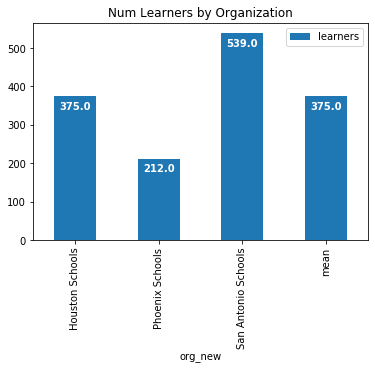

In [90]:
def learners_by_org():
  lByO = dfRaw.groupBy('org_new').agg(F.countDistinct('learner_id').alias('learners')).orderBy('org_new')
  pdDf = lByO.toPandas()

  # Add mean
  meanlearners = lByO.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Num Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
learners_by_org()

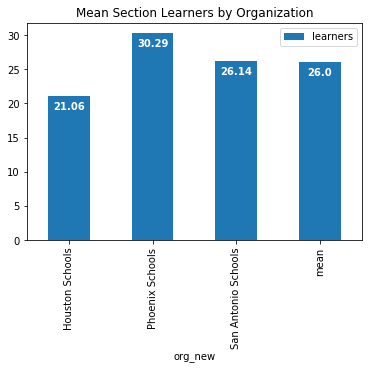

In [91]:
def sec_learners_by_org():
  lByS = dfRaw.groupBy('org_new','section_id').agg(F.countDistinct('learner_id').alias('learners'))
  # Av
  lBySMean = lByS.groupBy('org_new').agg( F.avg('learners').alias('learners') ).orderBy('org_new')
  pdDf = lBySMean.toPandas()

  # Add mean
  meanlearners = lBySMean.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Mean Section Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_learners_by_org()

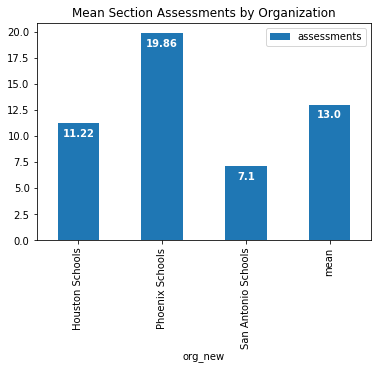

In [92]:
def sec_assess_by_org():
  assessBySection = dfRaw.groupBy('org_new','section_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)


  ax = pdDf.plot.bar('org_new','assessments', title='Mean Section Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_assess_by_org()

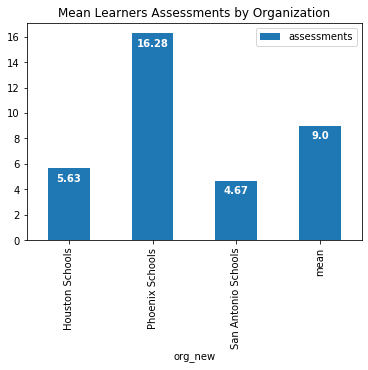

In [93]:
def assess_by_org():
  assessBySection = dfRaw.groupBy('org_new','learner_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','assessments', title='Mean Learners Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
assess_by_org()

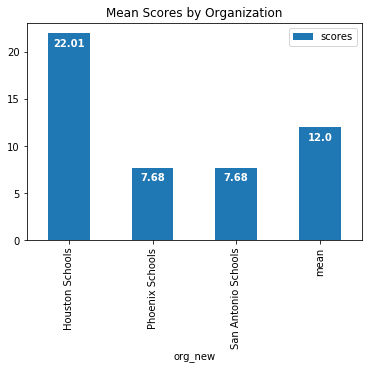

In [94]:
# scores by orgs
def scores_by_orgs():
  sByO = dfRaw.groupBy('org_new').agg( F.avg('final_score_unweighted').alias('scores') ).orderBy('org_new')

  pdDf = sByO.toPandas()

  # Add mean
  meanAssess = sByO.agg(F.round(F.avg(F.col('scores'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'scores': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','scores', title='Mean Scores by Organization')
  annotate_plot(ax)
  plt.show()
  
scores_by_orgs()